In [7]:
from clawpack import pyclaw
from clawpack import riemann
import numpy as np

In [2]:
from clawpack import version

In [6]:
print(version.version)

5.9.0


In [8]:
def main():
    # (1) Define the Finite Voluem solver to be used with a Riemann Solver from
    # the library
    solver = pyclaw.ClawSolver1D(riemann.advection_1D)
    solver.bc_lower[0] = pyclaw.BC.periodic
    solver.bc_upper[0] = pyclaw.BC.periodic

    # (2) Define the mesh
    x_dimension = pyclaw.Dimension(0.0, 1.0, 100)
    domain = pyclaw.Domain(x_dimension)

    # (3) Instantiate a solution field on the Mesh
    solution = pyclaw.Solution(solver.num_eqn, domain,)

    # (4) Prescribe an initial state
    state = solution.state
    cell_center_coordinates = state.grid.p_centers[0]
    state.q[0, :] = np.where(
        (cell_center_coordinates > 0.2)
        &
        (cell_center_coordinates < 0.4),
        1.0,
        0.0,
    )

    # (5) Assign problem-specific parameters ("u" refers to the advection speed)
    state.problem_data["u"] = 1.0

    # (6) The controller takes care of the time integration
    controller = pyclaw.Controller()
    controller.solution = solution
    controller.solver = solver
    controller.tfinal = 1.0

    # (7) Run and visualize
    controller.run()

    pyclaw.plot.interactive_plot()

2023-12-22 12:08:03,384 INFO CLAW: Solution 0 computed for time t=0.000000
2023-12-22 12:08:03,388 INFO CLAW: Solution 1 computed for time t=0.100000
2023-12-22 12:08:03,392 INFO CLAW: Solution 2 computed for time t=0.200000
2023-12-22 12:08:03,395 INFO CLAW: Solution 3 computed for time t=0.300000
2023-12-22 12:08:03,398 INFO CLAW: Solution 4 computed for time t=0.400000
2023-12-22 12:08:03,403 INFO CLAW: Solution 5 computed for time t=0.500000
2023-12-22 12:08:03,406 INFO CLAW: Solution 6 computed for time t=0.600000
2023-12-22 12:08:03,409 INFO CLAW: Solution 7 computed for time t=0.700000
2023-12-22 12:08:03,412 INFO CLAW: Solution 8 computed for time t=0.800000
2023-12-22 12:08:03,417 INFO CLAW: Solution 9 computed for time t=0.900000
2023-12-22 12:08:03,421 INFO CLAW: Solution 10 computed for time t=1.000000


/usr/lib/python3.11/site-packages/clawpack/visclaw/frametools.py:936: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  elif pp['patch_bgcolor'] is not 'w':


Input number of spatial dimensions for this data (default=1): Executed setplot successfully

Interactive plotting... 
Type ? at IPLOT prompt for list of commands
    Reading  Frame 0 at t = 0  from outdir = /home/carlosal1015/Documents/thesis-project/sandbox/_output
    Plotting Frame 0 at t = 0.0
    Reading  Frame 1 at t = 0.1  from outdir = /home/carlosal1015/Documents/thesis-project/sandbox/_output
    Plotting Frame 1 at t = 0.1
    Reading  Frame 2 at t = 0.2  from outdir = /home/carlosal1015/Documents/thesis-project/sandbox/_output
    Plotting Frame 2 at t = 0.2
    Reading  Frame 3 at t = 0.3  from outdir = /home/carlosal1015/Documents/thesis-project/sandbox/_output
    Plotting Frame 3 at t = 0.3
    Reading  Frame 4 at t = 0.4  from outdir = /home/carlosal1015/Documents/thesis-project/sandbox/_output
    Plotting Frame 4 at t = 0.4
    Reading  Frame 5 at t = 0.5  from outdir = /home/carlosal1015/Documents/thesis-project/sandbox/_output
    Plotting Frame 5 at t = 0.5
    Re

KeyboardInterrupt: Interrupted by user

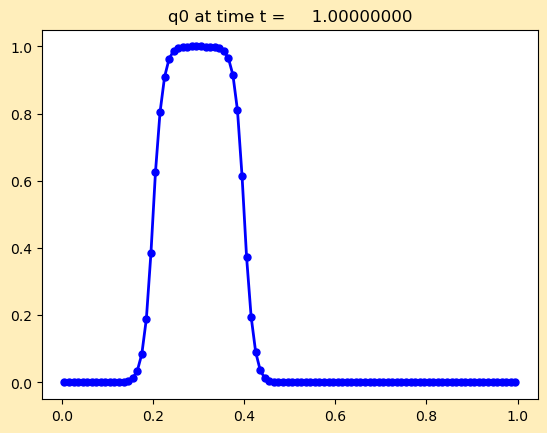

In [9]:
main()